<a href="https://colab.research.google.com/github/JOEJOSEJOSEPH/SVR/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [ ]:
df['Hours']=df['Hours of Study']

In [ ]:
df=df[['Hours','Marks']]

In [ ]:
df

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [ ]:
df.isnull().sum()

Hours    0
Marks    0
dtype: int64

Text(0.5, 1.0, 'Hours of Study V/s Marks')

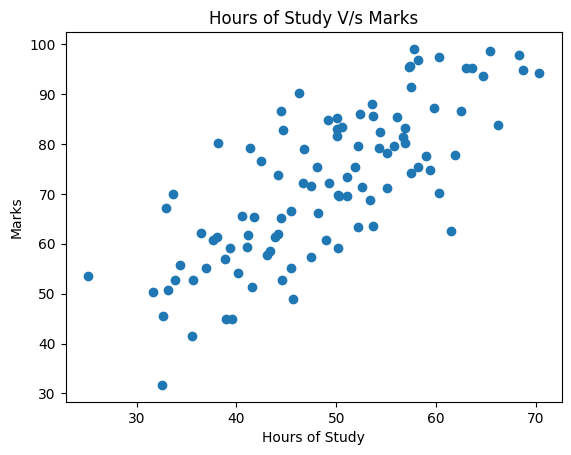

In [ ]:
plt.scatter(df.Hours, df.Marks)
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.title('Hours of Study V/s Marks')

<Axes: >

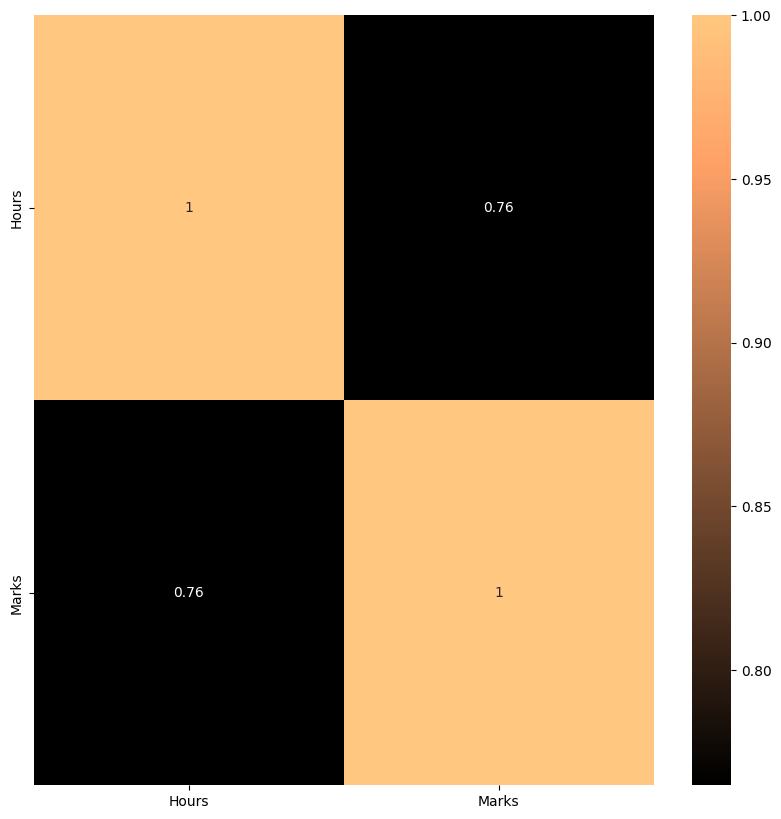

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='copper')

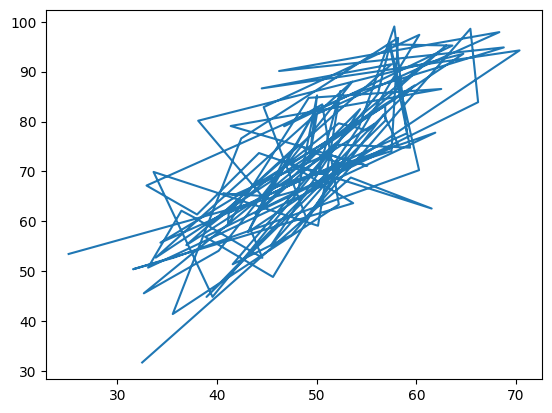

In [ ]:
plt.plot(df.Hours,df.Marks)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
y

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

In [ ]:
stanscale = StandardScaler()

In [ ]:
X = stanscale.fit_transform(X.reshape(-1,1))
y = stanscale.fit_transform(y.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=10)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))

In [ ]:
y_pred

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

In [ ]:
y_test = stanscale.inverse_transform(y_test)

In [ ]:
y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
r2_score(y_test, y_pred)

0.5943071038285547

In [ ]:
mean_absolute_error(y_test, y_pred)

6.933427431006029